<a href="https://colab.research.google.com/github/naka-c1024/classify_pokemon/blob/main/classify_pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pillow

In [ ]:
import os
dir = os.listdir("/content/drive/MyDrive/pokemon_data/validation")
print(dir)
file_path = ("/content/drive/MyDrive/pokemon_data/validation/.ipynb_checkpoints")
os.rmdir(file_path)
dir = os.listdir("/content/drive/MyDrive/pokemon_data/validation")
print(dir)

['pikachu', '.ipynb_checkpoints', 'pichu']
['pikachu', 'pichu']


In [2]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator


model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(64, 64, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dense(2))
model.add(Activation("softmax"))
# model.summary()
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"])
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/pokemon_data/train",
    target_size=(64, 64),
    batch_size=10)
validation_generator = test_datagen.flow_from_directory(
    "/content/drive/MyDrive/pokemon_data/validation",
    target_size=(64, 64),
    batch_size=10)
model.fit(
    train_generator,
    epochs=10,
    steps_per_epoch=8)
model.save("/content/drive/MyDrive/model.h5")
print("Finish")


Found 80 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Epoch 1/10
8/8 [==============================] - 22s 3s/step - loss: 1.3784 - accuracy: 0.5500
Epoch 2/10
8/8 [==============================] - 1s 125ms/step - loss: 0.6581 - accuracy: 0.6125
Epoch 3/10
8/8 [==============================] - 1s 124ms/step - loss: 0.5919 - accuracy: 0.7375
Epoch 4/10
8/8 [==============================] - 1s 126ms/step - loss: 0.3835 - accuracy: 0.8375
Epoch 5/10
8/8 [==============================] - 1s 125ms/step - loss: 0.3961 - accuracy: 0.8500
Epoch 6/10
8/8 [==============================] - 1s 123ms/step - loss: 0.2679 - accuracy: 0.8750
Epoch 7/10
8/8 [==============================] - 1s 123ms/step - loss: 0.1766 - accuracy: 0.9375
Epoch 8/10
8/8 [==============================] - 1s 123ms/step - loss: 0.0902 - accuracy: 0.9750
Epoch 9/10
8/8 [==============================] - 1s 126ms/step - loss: 0.1288 - accuracy: 0.9500
Epoch 10/10
8/8 [=======================

画像のpathを入力してください :/content/drive/MyDrive/pokemon_data/validation/pikachu/ダウンロード (3).jpeg


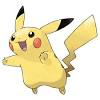

リサイズ後の画像


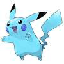

ピカチュー


In [18]:
from google.colab.patches import cv2_imshow
from keras.preprocessing import image
import numpy as np
from keras.models import load_model
from IPython.display import Image,display_jpeg

name = input("画像のpathを入力してください :")
display_jpeg(Image(name))
image = image.load_img(name, target_size=(64, 64))
image = np.array(image)
print("リサイズ後の画像")
cv2_imshow(image)
model = load_model("/content/drive/MyDrive/model.h5")
np_image = np.array(image)
np_image = np_image / 255
np_image = np_image[np.newaxis, :, :, :]
result = model(np_image)
if result[0][0] > result[0][1]:
    print("ピチュー")
else:
    print("ピカチュー")